***Stage 1: Obtain Data*** <br>
https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [ ]:
# Import raw data
df <- read.csv("mxmh_survey_results.csv")

***Stage 2: Scrubbing Data***

In [ ]:
# Check for dataset information
str(df)

'data.frame':	736 obs. of  33 variables:
 $ Timestamp                   : chr  "8/27/2022 19:29:02" "8/27/2022 19:57:31" "8/27/2022 21:28:18" "8/27/2022 21:40:40" ...
 $ Age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ Primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ Hours.per.day               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ While.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ Instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ Composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ Fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ Exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ Foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ BPM                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ Frequency..Classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ Frequency..Country.         : chr  "Nev

In [ ]:
# Display the top record of the dataset
head(df,5)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,I understand.
2,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.


# Data cleaning

**Check for Missing Values, Imputation & Deletion**

In [ ]:
# Check for missing values
missing_values <- colSums(is.na(df) | df == "")

missing_table <- data.frame(Column = names(missing_values), Missing_Values = missing_values, row.names = NULL)

missing_table <- data.frame(Column = names(missing_values), Missing_Values = missing_values, row.names = NULL)

print(missing_table)

# Filter rows with missing values
missing_table_1 <- missing_table[missing_table$Missing_Values > 0, ]

print(missing_table_1)

                         Column Missing_Values
1                     Timestamp              0
2                           Age              1
3     Primary.streaming.service              1
4                 Hours.per.day              0
5                 While.working              3
6               Instrumentalist              4
7                      Composer              1
8                     Fav.genre              0
9                   Exploratory              0
10            Foreign.languages              4
11                          BPM            107
12        Frequency..Classical.              0
13          Frequency..Country.              0
14              Frequency..EDM.              0
15             Frequency..Folk.              0
16           Frequency..Gospel.              0
17          Frequency..Hip.hop.              0
18             Frequency..Jazz.              0
19            Frequency..K.pop.              0
20            Frequency..Latin.              0
21           

In [ ]:
# Calculate mean values for BPM and Age
mean_value_BPM <- mean(df$BPM, na.rm = TRUE)
mean_value_Age <- mean(df$Age, na.rm = TRUE)

# Replace missing values in the column "BPM" with mean value
df$BPM[is.na(df$BPM)] <- mean_value_BPM

# Replace missing values in the column "Age" with mean value
df$Age[is.na(df$Age)] <- mean_value_Age

# Print mean values
print(mean_value_BPM)
print(mean_value_Age)

[1] 1589948
[1] 25.2068


In [ ]:
# To confirm the change

missing_values <- colSums(is.na(df) | df == "")

missing_table <- data.frame(Column = names(missing_values), Missing_Values = missing_values, row.names = NULL)

missing_table <- missing_table[missing_table$Missing_Values > 0, ]

print(missing_table)

                      Column Missing_Values
3  Primary.streaming.service              1
5              While.working              3
6            Instrumentalist              4
7                   Composer              1
10         Foreign.languages              4
32             Music.effects              8


In [ ]:
# Drop rows with missing value & confirm the change

df1 <- df[!(rowSums(is.na(df) | df == "") > 0), ]

missing_values <- colSums(is.na(df1) | df1 == "")

missing_table <- data.frame(Column = names(missing_values), Missing_Values = missing_values, row.names = NULL)

print(missing_table)

                         Column Missing_Values
1                     Timestamp              0
2                           Age              0
3     Primary.streaming.service              0
4                 Hours.per.day              0
5                 While.working              0
6               Instrumentalist              0
7                      Composer              0
8                     Fav.genre              0
9                   Exploratory              0
10            Foreign.languages              0
11                          BPM              0
12        Frequency..Classical.              0
13          Frequency..Country.              0
14              Frequency..EDM.              0
15             Frequency..Folk.              0
16           Frequency..Gospel.              0
17          Frequency..Hip.hop.              0
18             Frequency..Jazz.              0
19            Frequency..K.pop.              0
20            Frequency..Latin.              0
21           

**Standardise data formatting, remove duplicate values and redundant columns**

In [ ]:
# Display information about the dataset
str(df1)

'data.frame':	719 obs. of  33 variables:
 $ Timestamp                   : chr  "8/27/2022 21:28:18" "8/27/2022 21:40:40" "8/27/2022 21:54:47" "8/27/2022 21:56:50" ...
 $ Age                         : num  18 61 18 18 18 21 19 18 18 19 ...
 $ Primary.streaming.service   : chr  "Spotify" "YouTube Music" "Spotify" "Spotify" ...
 $ Hours.per.day               : num  4 2.5 4 5 3 1 6 1 3 8 ...
 $ While.working               : chr  "No" "Yes" "Yes" "Yes" ...
 $ Instrumentalist             : chr  "No" "No" "No" "Yes" ...
 $ Composer                    : chr  "No" "Yes" "No" "Yes" ...
 $ Fav.genre                   : chr  "Video game music" "Jazz" "R&B" "Jazz" ...
 $ Exploratory                 : chr  "No" "Yes" "Yes" "Yes" ...
 $ Foreign.languages           : chr  "Yes" "Yes" "No" "Yes" ...
 $ BPM                         : num  132 84 107 86 66 ...
 $ Frequency..Classical.       : chr  "Never" "Sometimes" "Never" "Rarely" ...
 $ Frequency..Country.         : chr  "Never" "Never" "Never" "Somet

In [ ]:
# Display summary of the dataframe
summary(df1)

  Timestamp              Age        Primary.streaming.service Hours.per.day   
 Length:719         Min.   :10.00   Length:719                Min.   : 0.000  
 Class :character   1st Qu.:18.00   Class :character          1st Qu.: 2.000  
 Mode  :character   Median :21.00   Mode  :character          Median : 3.000  
                    Mean   :25.18                             Mean   : 3.577  
                    3rd Qu.:28.00                             3rd Qu.: 5.000  
                    Max.   :89.00                             Max.   :24.000  
 While.working      Instrumentalist      Composer          Fav.genre        
 Length:719         Length:719         Length:719         Length:719        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              

In [ ]:
# When checking manually, Age contains decimal & should be rounded the "Age" column to the nearest integer
df1$Age <- round(df1$Age)

In [ ]:
# Check for unique values

library(dplyr)

# Function to classify columns and sort unique values
classify <- function(column) {
  if (is.numeric(column)) {
    type <- "Numeric"
    unique_values <- unique(column)
  } else {
    unique_values <- unique(column)
    if (all(unique_values %in% c("Yes", "No")) && length(unique_values) == 2) {
      type <- "Binomial"
    } else if (is.factor(column) || is.character(column)) {
      type <- "Categorical"
    } else {
      type <- "Other"
    }
  }

  # Sort unique values alphabetically and then join
  value_count <- length(unique_values)
  unique_values_formatted <- if (value_count > 10) {
    sorted_values <- sort(unique_values)
    paste("Many values:", toString(sample(sorted_values, 10)), "...")
  } else {
    sorted_values <- sort(unique_values)
    toString(sorted_values)
  }

  return(c(Type = type, UniqueValueCount = value_count, UniqueValues = unique_values_formatted))
}

# Apply the function to each column of your dataset 'mxmh_clean'
summary_info <- sapply(df1, classify, simplify = FALSE)

# Convert the summary information to a data frame for nicer display
summary_table <- tibble(
  Variable = names(summary_info),
  Type = sapply(summary_info, `[`, "Type"),
  UniqueValueCount = sapply(summary_info, `[`, "UniqueValueCount"),
  UniqueValues = sapply(summary_info, `[`, "UniqueValues")
)

# Print the summary table with sorted unique values, displaying all rows
print(summary_table, n = Inf)


# A tibble: 33 × 4
   Variable                     Type        UniqueValueCount UniqueValues       
   <chr>                        <chr>       <chr>            <chr>              
 1 Timestamp                    Categorical 718              Many values: 9/19/…
 2 Age                          Numeric     61               Many values: 32, 3…
 3 Primary.streaming.service    Categorical 6                Apple Music, I do …
 4 Hours.per.day                Numeric     26               Many values: 3, 0.…
 5 While.working                Binomial    2                No, Yes            
 6 Instrumentalist              Binomial    2                No, Yes            
 7 Composer                     Binomial    2                No, Yes            
 8 Fav.genre                    Categorical 16               Many values: Latin…
 9 Exploratory                  Binomial    2                No, Yes            
10 Foreign.languages            Binomial    2                No, Yes            
11 BPM   

In [ ]:
# Drop the "Timestamp" (not useful) and "Permissions" (only 1 value) columns from the dataframe
df1 <- df1[, !(names(df1) %in% c("Timestamp", "Permissions"))]

**Remove outliers**

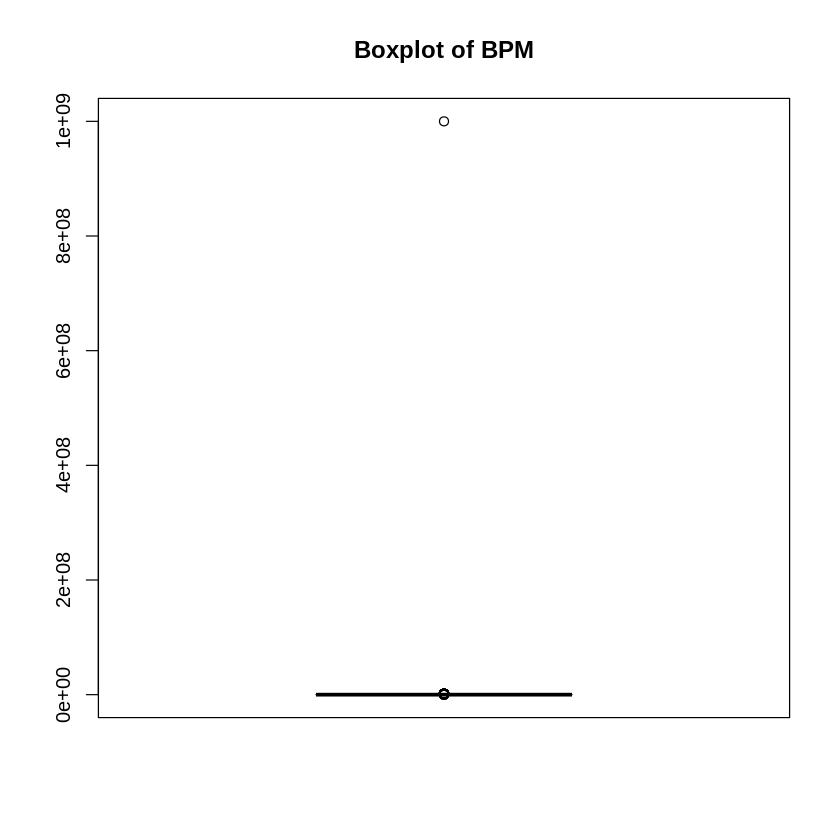

In [ ]:
# Checking for outliers in the dataset

boxplot(df1$BPM, main = "Boxplot of BPM")

In [ ]:
# Choose the maximum quartile to fill in the outliers for the "BPM" column
max_cr <- quantile(df1$BPM, 0.995)

# Print the maximum quartile value
print(max_cr)

  99.5% 
1589948 


In [ ]:
# Filter the dataframe to include only rows where "BPM" exceeds the maximum quartile value
outliers <- df1[df1$BPM > max_cr, ]

# Print the filtered dataframe
print(outliers)

    Age Primary.streaming.service Hours.per.day While.working Instrumentalist
569  16                   Spotify             7           Yes              No
    Composer        Fav.genre Exploratory Foreign.languages   BPM
569       No Video game music         Yes                No 1e+09
    Frequency..Classical. Frequency..Country. Frequency..EDM. Frequency..Folk.
569                 Never              Rarely       Sometimes           Rarely
    Frequency..Gospel. Frequency..Hip.hop. Frequency..Jazz. Frequency..K.pop.
569              Never              Rarely           Rarely             Never
    Frequency..Latin. Frequency..Lofi. Frequency..Metal. Frequency..Pop.
569             Never            Never   Very frequently       Sometimes
    Frequency..R.B. Frequency..Rap. Frequency..Rock.
569           Never Very frequently           Rarely
    Frequency..Video.game.music. Anxiety Depression Insomnia OCD Music.effects
569                    Sometimes       4          8        8   4   

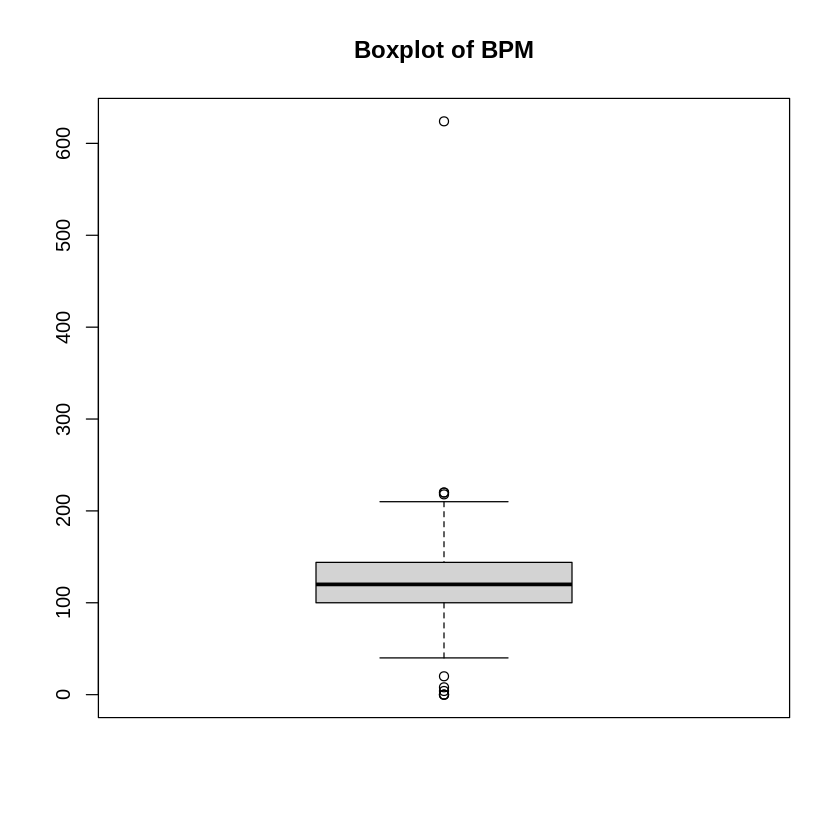

In [ ]:
#Assigning the new data to a new data frame

df2 <- df1[df1$BPM < max_cr, ]

# Checking for outliers in the dataset

boxplot(df2$BPM, main = "Boxplot of BPM")

In [ ]:
# Apply the same steps above, but using 99.95% maximum quartile

max_cr <- quantile(df2$BPM, 0.9995)
print(max_cr)

# Filter the dataframe to include only rows where "BPM" exceeds the maximum quartile value
outliers <- df2[df2$BPM > max_cr, ]
print(outliers)


 99.95% 
499.972 
    Age Primary.streaming.service Hours.per.day While.working Instrumentalist
645  16   Other streaming service             4           Yes              No
    Composer Fav.genre Exploratory Foreign.languages BPM Frequency..Classical.
645       No       EDM         Yes               Yes 624             Sometimes
    Frequency..Country. Frequency..EDM. Frequency..Folk. Frequency..Gospel.
645               Never Very frequently            Never              Never
    Frequency..Hip.hop. Frequency..Jazz. Frequency..K.pop. Frequency..Latin.
645               Never            Never            Rarely             Never
    Frequency..Lofi. Frequency..Metal. Frequency..Pop. Frequency..R.B.
645            Never             Never           Never           Never
    Frequency..Rap. Frequency..Rock. Frequency..Video.game.music. Anxiety
645           Never            Never                    Sometimes       4
    Depression Insomnia OCD Music.effects
645          7        1   3   

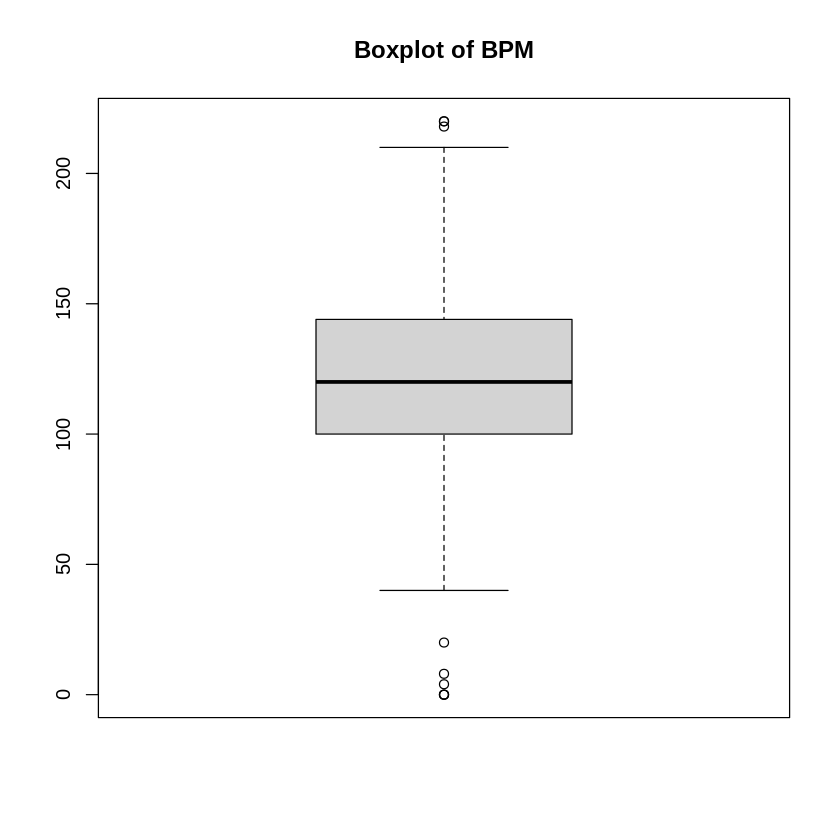

In [ ]:
#Assigning the new data to a new data frame

df3 <- df2[df2$BPM < max_cr, ]

# Checking for outliers in the dataset

boxplot(df3$BPM, main = "Boxplot of BPM")

In [ ]:
# Export the dataframe to a CSV file
write.csv(df3, file = "clean_data.csv", row.names = FALSE)

# Exploratory Data Analysis

In [ ]:
# Import cleaned data

mxmh_clean <- read.csv("clean_data.csv")
dim(mxmh_clean)

[1] 614  31

**Plot summary table with Variable, Type, Unique Value Count and Unique Values**

In [ ]:
# Check for unique values

library(dplyr)

# Function to classify columns and sort unique values
classify <- function(column) {
  if (is.numeric(column)) {
    type <- "Numeric"
    unique_values <- unique(column)
  } else {
    unique_values <- unique(column)
    if (all(unique_values %in% c("Yes", "No")) && length(unique_values) == 2) {
      type <- "Binomial"
    } else if (is.factor(column) || is.character(column)) {
      type <- "Categorical"
    } else {
      type <- "Other"
    }
  }

  # Sort unique values alphabetically and then join
  value_count <- length(unique_values)
  unique_values_formatted <- if (value_count > 10) {
    sorted_values <- sort(unique_values)
    paste("Many values:", toString(sample(sorted_values, 10)), "...")
  } else {
    sorted_values <- sort(unique_values)
    toString(sorted_values)
  }

  return(c(Type = type, UniqueValueCount = value_count, UniqueValues = unique_values_formatted))
}

# Apply the function to each column of your dataset 'mxmh_clean'
summary_info <- sapply(mxmh_clean, classify, simplify = FALSE)

# Convert the summary information to a data frame for nicer display
summary_table <- tibble(
  Variable = names(summary_info),
  Type = sapply(summary_info, `[`, "Type"),
  UniqueValueCount = sapply(summary_info, `[`, "UniqueValueCount"),
  UniqueValues = sapply(summary_info, `[`, "UniqueValues")
)

# Print the summary table with sorted unique values, displaying all rows
print(summary_table, n = Inf)


# A tibble: 31 × 4
   Variable                     Type        UniqueValueCount UniqueValues       
   <chr>                        <chr>       <chr>            <chr>              
 1 Age                          Numeric     59               Many values: 51, 5…
 2 Primary.streaming.service    Categorical 6                Apple Music, I do …
 3 Hours.per.day                Numeric     23               Many values: 15, 8…
 4 While.working                Binomial    2                No, Yes            
 5 Instrumentalist              Binomial    2                No, Yes            
 6 Composer                     Binomial    2                No, Yes            
 7 Fav.genre                    Categorical 16               Many values: Lofi,…
 8 Exploratory                  Binomial    2                No, Yes            
 9 Foreign.languages            Binomial    2                No, Yes            
10 BPM                          Numeric     133              Many values: 109, …
11 Freque

**Numerical Value**

1. Numerical Value (Descriptive Statistics)

In [ ]:
# Respondent's Details
cat("Age:\n")
summary (mxmh_clean$Age)
cat("Hours/Day:\n")
summary (mxmh_clean$Hours.per.day)
cat("BPM:\n")
summary (mxmh_clean$BPM)

# Respondent's Mental Health Status
cat("Anxiety:\n")
summary (mxmh_clean$Anxiety)
cat("Depression:\n")
summary (mxmh_clean$Depression)
cat("Imsomnia:\n")
summary (mxmh_clean$Insomnia)
cat("OCD:\n")
summary (mxmh_clean$OCD)

Age:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   18.00   21.00   24.82   27.00   89.00 

Hours/Day:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.697   5.000  24.000 

BPM:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   100.0   120.0   122.8   144.0   220.0 

Anxiety:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.00    6.00    5.89    8.00   10.00 

Depression:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   5.000   4.886   7.000  10.000 

Imsomnia:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   3.799   6.000  10.000 

OCD:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   2.656   5.000  10.000 

2. Numerical Value (Boxplot)

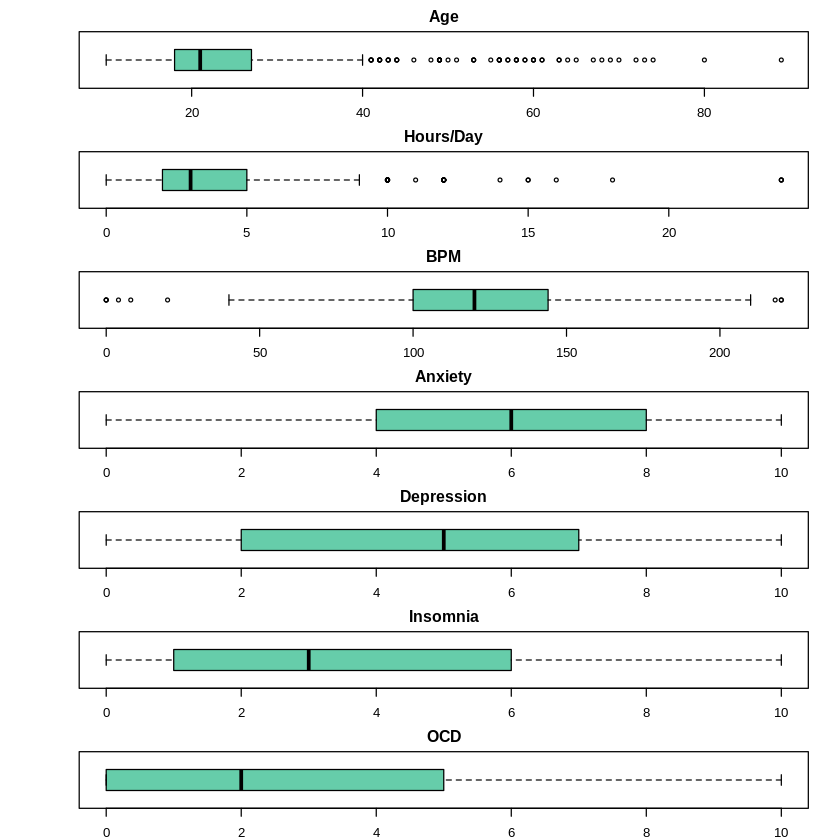

In [ ]:
par(mfrow=c(7, 1))  # Setting up a 7x1 grid for plots
par(mar = c(2, 5, 2, 2))  # Adjusting margins

# Horizontal Boxplot for Age
boxplot(mxmh_clean$Age, horizontal = TRUE, main="Age", xlab="Age", col="mediumaquamarine")

# Horizontal Boxplot for Hours per Day
boxplot(mxmh_clean$Hours.per.day, horizontal = TRUE, main="Hours/Day", xlab="Hours", col="mediumaquamarine")

# Horizontal Boxplot for BPM
boxplot(mxmh_clean$BPM, horizontal = TRUE, main="BPM", xlab="BPM", col="mediumaquamarine")

# Horizontal Boxplot for Anxiety
boxplot(mxmh_clean$Anxiety, horizontal = TRUE, main="Anxiety", xlab="Level", col="mediumaquamarine")

# Horizontal Boxplot for Depression
boxplot(mxmh_clean$Depression, horizontal = TRUE, main="Depression", xlab="Level", col="mediumaquamarine")

# Horizontal Boxplot for Insomnia
boxplot(mxmh_clean$Insomnia, horizontal = TRUE, main="Insomnia", xlab="Level", col="mediumaquamarine")

# Horizontal Boxplot for OCD
boxplot(mxmh_clean$OCD, horizontal = TRUE, main="OCD", xlab="Level", col="mediumaquamarine")


3. Numerical Value (Histogram)

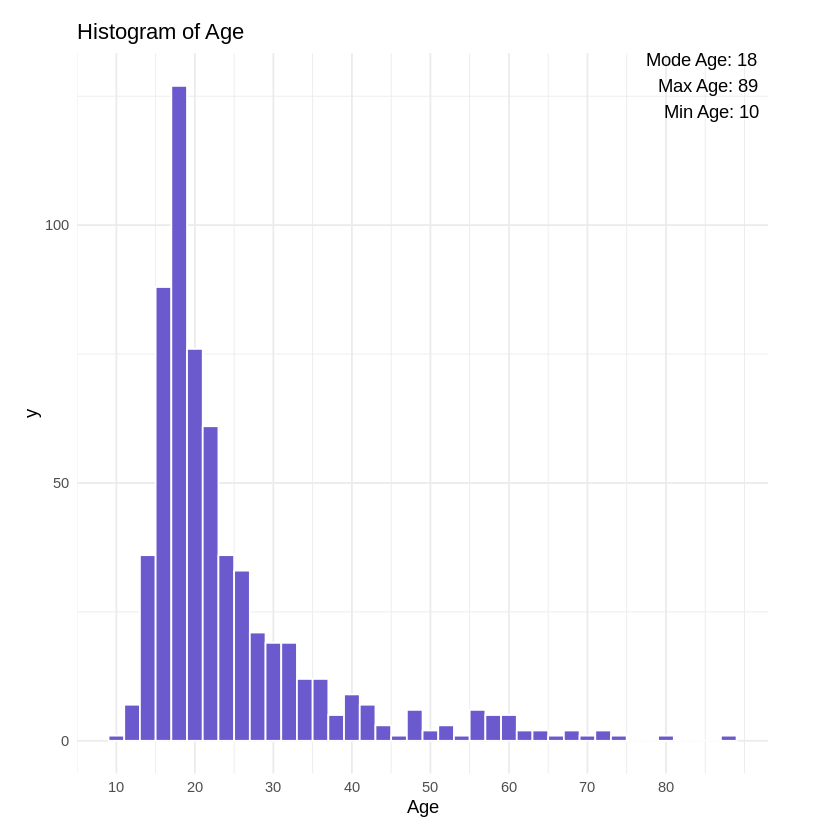

In [ ]:
library(ggplot2)

# Calculate statistics
min_age <- min(mxmh_clean$Age, na.rm = TRUE)
max_age <- max(mxmh_clean$Age, na.rm = TRUE)
mode_age <- names(which.max(table(mxmh_clean$Age)))

# Create histogram
p <- ggplot(mxmh_clean, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "slateblue", color = "white") +
  labs(title = "Histogram of Age", x = "Age") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(min_age, max_age, by = 10)) +
  theme(plot.margin = unit(c(1,3,1,1), "lines"))  # Increase right margin to make space for annotations

# Add annotations in the margin
p + annotate("text", x = Inf, y = Inf, label = paste("Min Age:", min_age), hjust = 1.1, vjust = 5) +
    annotate("text", x = Inf, y = Inf, label = paste("Max Age:", max_age), hjust = 1.1, vjust = 3) +
    annotate("text", x = Inf, y = Inf, label = paste("Mode Age:", mode_age), hjust = 1.1, vjust = 1)


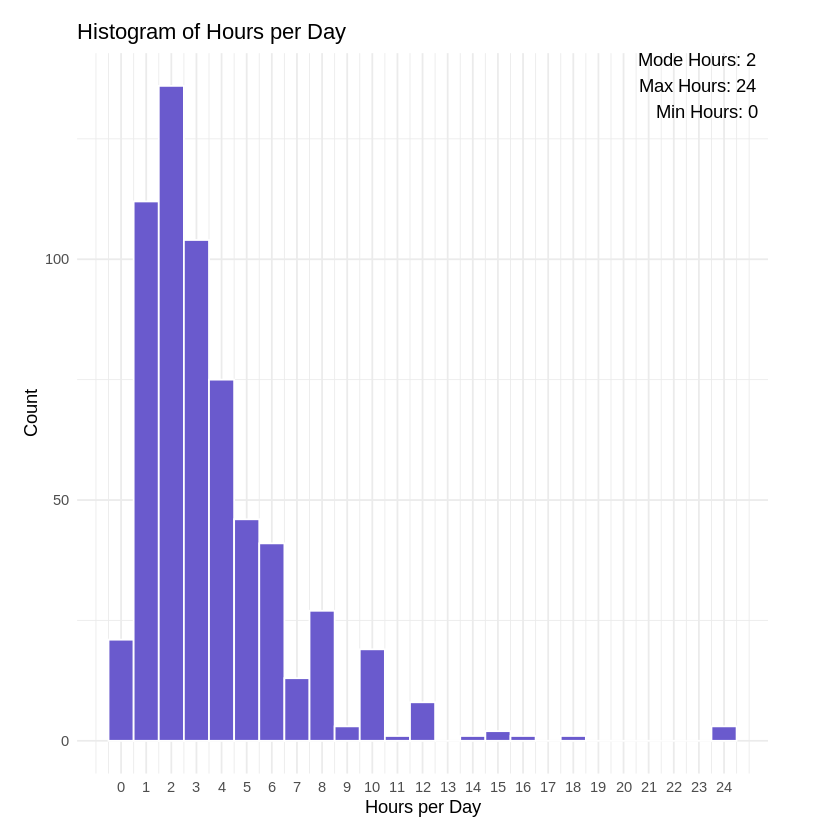

In [ ]:
# Hours per Day (Histogram)

library(ggplot2)

# Calculate statistics for Hours per Day
min_hours <- min(mxmh_clean$Hours.per.day, na.rm = TRUE)
max_hours <- max(mxmh_clean$Hours.per.day, na.rm = TRUE)
mode_hours <- names(which.max(table(mxmh_clean$Hours.per.day)))

# Create histogram for Hours per Day
p <- ggplot(mxmh_clean, aes(x = Hours.per.day)) +
  geom_histogram(binwidth = 1, fill = "slateblue", color = "white") +
  labs(title = "Histogram of Hours per Day", x = "Hours per Day", y = "Count") +
  scale_x_continuous(breaks = seq(min_hours, max_hours, by = 1)) +
  theme_minimal() +
  theme(plot.margin = unit(c(1,3,1,1), "lines"))  # Increase right margin to make space for annotations

# Add annotations in the margin for Hours per Day
p + annotate("text", x = Inf, y = Inf, label = paste("Min Hours:", min_hours), hjust = 1.1, vjust = 5) +
    annotate("text", x = Inf, y = Inf, label = paste("Max Hours:", max_hours), hjust = 1.1, vjust = 3) +
    annotate("text", x = Inf, y = Inf, label = paste("Mode Hours:", mode_hours), hjust = 1.1, vjust = 1)



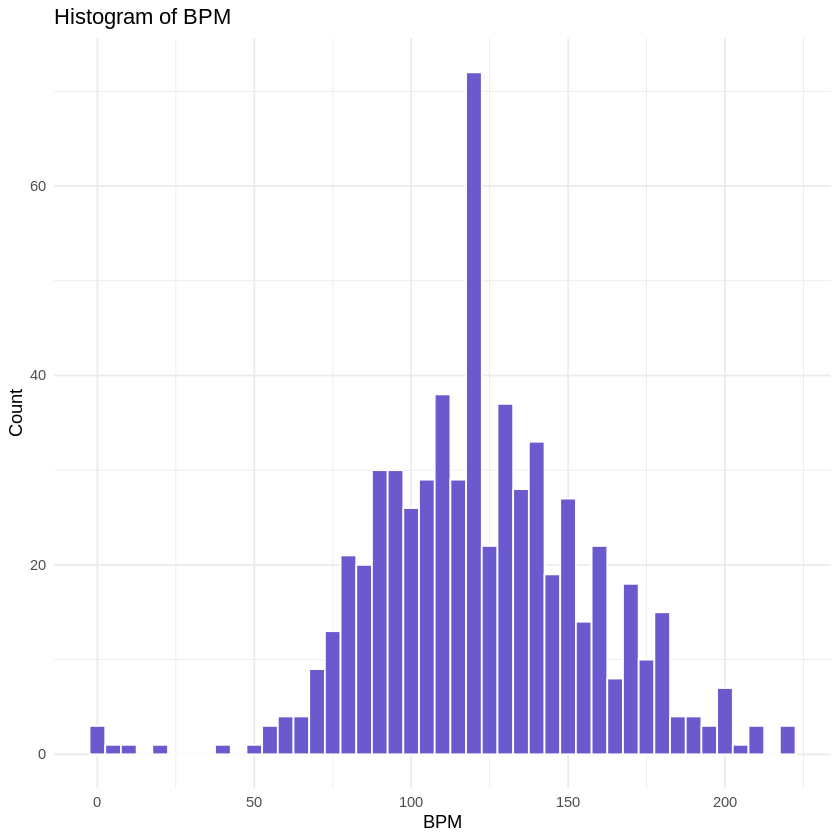

In [ ]:
# BPM (Histogram)

library(ggplot2)

ggplot(mxmh_clean, aes(x = BPM)) +
  geom_histogram(binwidth = 5, fill = "slateblue", color = "white") +
  labs(title = "Histogram of BPM", x = "BPM", y = "Count") +
  theme_minimal()

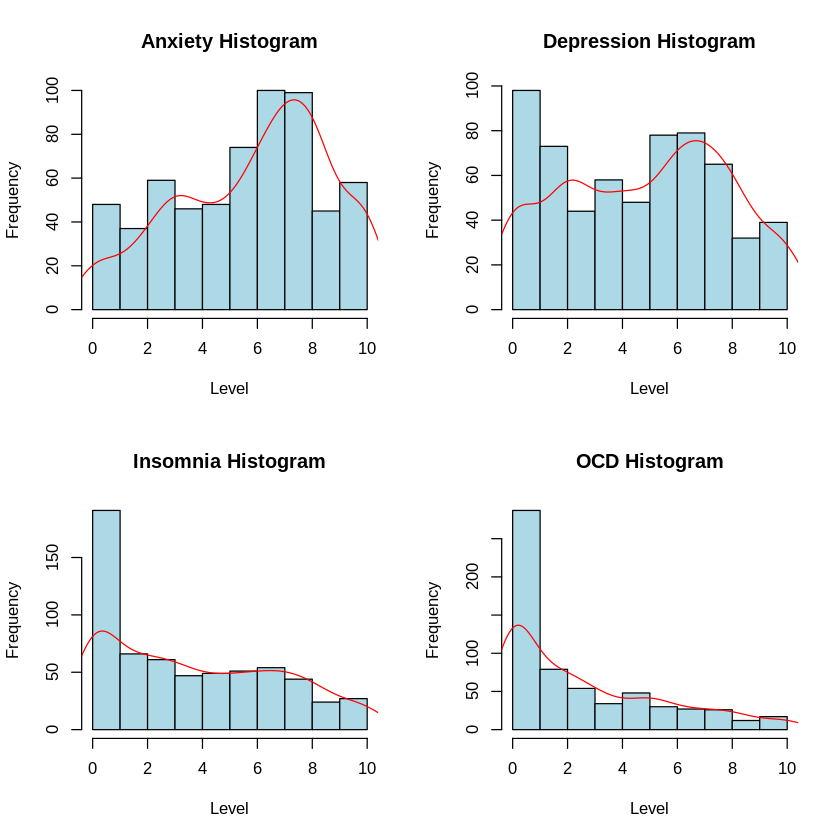

In [ ]:
# Mental Health Ranking (Distrubution with Density Line)

# Set up the layout for side-by-side plots
par(mfrow=c(2, 2))  # Setting the plot area to a 2 by 2 grid

# Function to add density line to histogram with counts
add_density_line <- function(data) {
  dens <- density(data, na.rm = TRUE)  # Calculate the density
  # Scale density to match the histogram's count scale
  dens$y <- dens$y * diff(h$mids[1:2]) * length(data)  # Adjusting the density scale
  lines(dens, col="red")  # Add the density line
}

# Histogram for Anxiety with counts and density line
h <- hist(mxmh_clean$Anxiety, main="Anxiety Histogram", xlab="Level", col="light blue", freq=TRUE)
add_density_line(mxmh_clean$Anxiety)

# Histogram for Depression with counts and density line
h <- hist(mxmh_clean$Depression, main="Depression Histogram", xlab="Level", col="light blue", freq=TRUE)
add_density_line(mxmh_clean$Depression)

# Histogram for Insomnia with counts and density line
h <- hist(mxmh_clean$Insomnia, main="Insomnia Histogram", xlab="Level", col="light blue", freq=TRUE)
add_density_line(mxmh_clean$Insomnia)

# Histogram for OCD with counts and density line
h <- hist(mxmh_clean$OCD, main="OCD Histogram", xlab="Level", col="light blue", freq=TRUE)
add_density_line(mxmh_clean$OCD)


**Categorical Value**

1. Categorical Value (Bar Chart)


                      Apple Music I do not use a streaming service. 
                               42                                56 
          Other streaming service                           Pandora 
                               39                                 9 
                          Spotify                     YouTube Music 
                              395                                73 


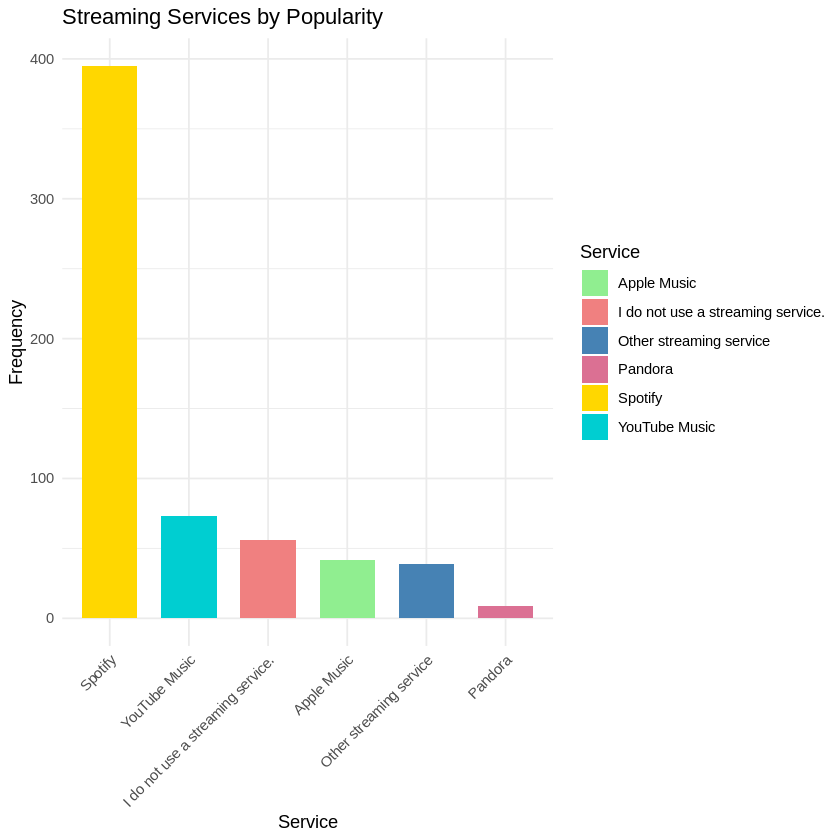

In [ ]:
# Primary Streaming Device (Bar chart)

library(ggplot2)

# Create a frequency table of 'Primary streaming service'
service_counts <- table(mxmh_clean$Primary.streaming.service)

# Convert the table to a data frame and name the columns
service_df <- as.data.frame(service_counts)
names(service_df) <- c("Service", "Frequency")

# Sort the data frame by frequency in descending order
service_df <- service_df[order(-service_df$Frequency), ]

# Define the colors for the bars
bar_colors <- c("lightgreen", "lightcoral", "steelblue", "palevioletred", "gold", "darkturquoise")

# Create a bar chart
bar_chart <- ggplot(service_df, aes(x = reorder(Service, -Frequency), y = Frequency, fill = Service)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = bar_colors) +  # Set the colors manually
  labs(title = "Streaming Services by Popularity", x = "Service", y = "Frequency") +  # Set the title and axis labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

# Print the bar chart
print(bar_chart)

# Create a frequency table for the 'Fav.genre' column
device_frequency <- table(mxmh_clean$Primary.streaming.service)

# Print the frequency table
print(device_frequency)


In [ ]:
# Primary Streaming Device (Frequency Table)
service_frequency <- table(mxmh_clean$Primary.streaming.service)

# Sort the frequency table in descending order
service_frequency <- sort(service_frequency, decreasing = TRUE)

# Print the sorted frequency table
print(service_frequency)



                          Spotify                     YouTube Music 
                              395                                73 
I do not use a streaming service.                       Apple Music 
                               56                                42 
          Other streaming service                           Pandora 
                               39                                 9 


2. Categorical Value (Music Genre)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



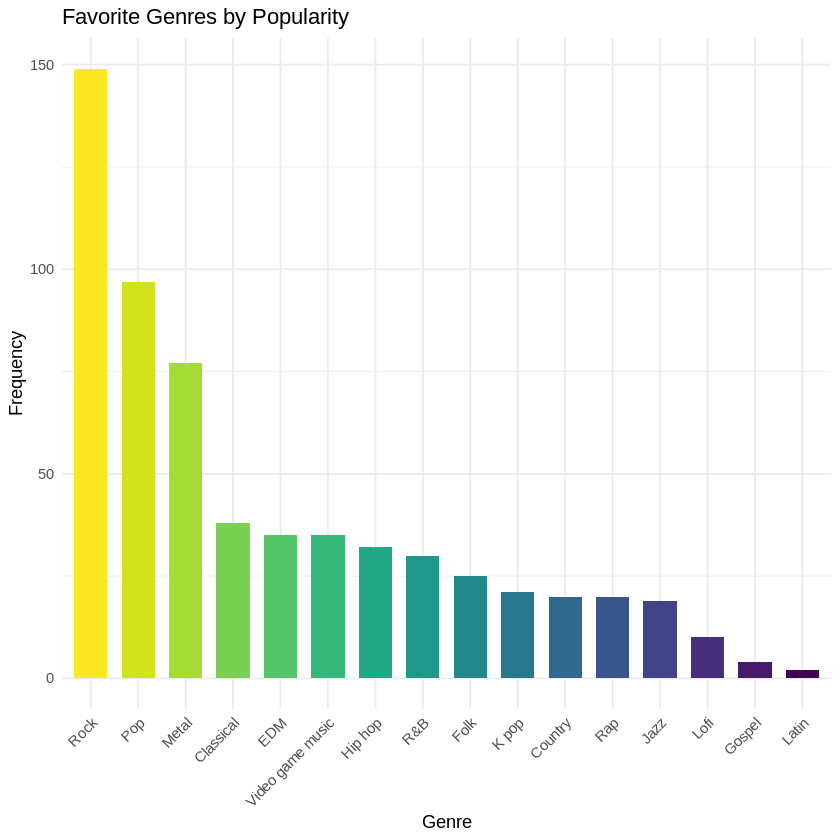

In [ ]:
# Music Genre (Bar Chart)

install.packages("viridis")
library(ggplot2)
library(viridis)  # Load the viridis package for the color palette

# Create a frequency table of 'Fav.genre'
genre_counts <- table(mxmh_clean$Fav.genre)

# Convert the table to a data frame and name the columns
genre_df <- as.data.frame(genre_counts)
names(genre_df) <- c("Genre", "Frequency")

# Sort the data frame by frequency in descending order
genre_df <- genre_df[order(-genre_df$Frequency), ]

# Number of unique genres
num_genres <- length(unique(genre_df$Genre))

# Generate viridis colors, sorted to match the descending order of frequencies
colors <- rev(viridis(num_genres, option = "D"))

# Manually create a color assignment for each genre based on its sorted order
genre_colors <- setNames(colors, genre_df$Genre)

# Create a bar chart
bar_chart_genre <- ggplot(genre_df, aes(x = reorder(Genre, -Frequency), y = Frequency, fill = Genre)) +
  geom_bar(stat = "identity", width = 0.7) +
  labs(title = "Favorite Genres by Popularity", x = "Genre", y = "Frequency") +  # Set the title and axis labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
        legend.position = "none") +  # Remove the legend
  scale_fill_manual(values = genre_colors)  # Apply the viridis color palette manually with colors matched to sorted genres

# Print the bar chart
print(bar_chart_genre)


In [ ]:
# Music Genre (Frequency Table)

genre_frequency <- table(mxmh_clean$Fav.genre)

# Sort the frequency table in descending order
genre_frequency <- sort(genre_frequency, decreasing = TRUE)

# Print the sorted frequency table
print(genre_frequency)


            Rock              Pop            Metal        Classical 
             149               97               77               38 
             EDM Video game music          Hip hop              R&B 
              35               35               32               30 
            Folk            K pop          Country              Rap 
              25               21               20               20 
            Jazz             Lofi           Gospel            Latin 
              19               10                4                2 


3. Categorical Value (Frequency)

In [ ]:
# Music Genre Frequency (Frequency Table)

classical_freq <- table(mxmh_clean$Frequency..Classical.)
country_freq <- table(mxmh_clean$Frequency..Country.)
edm_freq <- table(mxmh_clean$Frequency..EDM.)
folk_freq <- table(mxmh_clean$Frequency..Folk.)
gospel_freq <- table(mxmh_clean$Frequency..Gospel.)
hip_hop_freq <- table(mxmh_clean$Frequency..Hip.hop.)
jazz_freq <- table(mxmh_clean$Frequency..Jazz.)
kpop_freq <- table(mxmh_clean$Frequency..K.pop.)
latin_freq <- table(mxmh_clean$Frequency..Latin.)
lofi_freq <- table(mxmh_clean$Frequency..Lofi.)
metal_freq <- table(mxmh_clean$Frequency..Metal.)
pop_freq <- table(mxmh_clean$Frequency..Pop.)
rb_freq <- table(mxmh_clean$Frequency..R.B.)
rap_freq <- table(mxmh_clean$Frequency..Rap.)
rock_freq <- table(mxmh_clean$Frequency..Rock.)
video_game_music_freq <- table(mxmh_clean$Video.game.music.)

# Combine all frequency tables into a list
freq_tables <- list(
  Classical = classical_freq,
  Country = country_freq,
  EDM = edm_freq,
  Folk = folk_freq,
  Gospel = gospel_freq,
  HipHop = hip_hop_freq,
  Jazz = jazz_freq,
  KPop = kpop_freq,
  Latin = latin_freq,
  Lofi = lofi_freq,
  Metal = metal_freq,
  Pop = pop_freq,
  RnB = rb_freq,
  Rap = rap_freq,
  Rock = rock_freq,
  VideoGameMusic = video_game_music_freq
)

# Create a summary table
summary_table <- addmargins(do.call(cbind, freq_tables), margin = 2)

# Display the summary table
print(summary_table)

                Classical Country EDM Folk Gospel HipHop Jazz KPop Latin Lofi
Never                 138     289 249  242    446    145  208  347   362  229
Rarely                223     188 160  182    112    175  212  144   145  176
Sometimes             167      95 121  128     44    180  146   56    77  135
Very frequently        86      42  84   62     12    114   48   67    30   74
                Metal Pop RnB Rap Rock  Sum
Never             219  45 182 156   78 3335
Rarely            160 117 173 178   76 2421
Sometimes         112 215 151 164  183 1974
Very frequently   123 237 108 116  277 1480


In [ ]:
# Data in matrix form
data <- matrix(c(138, 223, 167, 86, 289, 188, 95, 42, 249, 160, 121, 84, 242, 182, 128, 62,
                 446, 112, 44, 12, 145, 175, 180, 114, 208, 212, 146, 48, 347, 144, 56, 67,
                 362, 145, 77, 30, 229, 176, 135, 74, 219, 160, 112, 123, 45, 117, 215, 237,
                 182, 173, 151, 108, 156, 178, 164, 116, 78, 76, 183, 277),
               nrow = 4, ncol = 15, byrow = TRUE,
               dimnames = list(c("Never", "Rarely", "Sometimes", "Very frequently"),
                               c("Classical", "Country", "EDM", "Folk", "Gospel", "HipHop", "Jazz",
                                 "KPop", "Latin", "Lofi", "Metal", "Pop", "RnB", "Rap", "Rock")))

# Convert matrix to data frame for easier manipulation
data_df <- as.data.frame(t(data))

# Finding the top 5 and bottom 5 genres for each frequency category with counts
top_bottom_5_with_counts <- apply(data_df, 2, function(x) {
  sorted_genres <- sort(x, decreasing = TRUE)
  top_5 <- names(sorted_genres)[1:5]
  bottom_5 <- names(sorted_genres)[(length(sorted_genres)-4):length(sorted_genres)]
  top_5_counts <- sorted_genres[1:5]
  bottom_5_counts <- sorted_genres[(length(sorted_genres)-4):length(sorted_genres)]
  list(Top5 = paste(top_5, top_5_counts, sep = ": "),
       Bottom5 = paste(bottom_5, bottom_5_counts, sep = ": "))
})

# Print results
top_bottom_5_with_counts


$Never
$Never$Top5
[1] "Gospel: 289"  "Latin: 249"   "RnB: 242"     "Country: 223" "HipHop: 188" 

$Never$Bottom5
[1] "Metal: 121" "Jazz: 95"   "Folk: 86"   "Pop: 84"    "KPop: 42"  


$Rarely
$Rarely$Top5
[1] "Country: 446" "Rap: 347"     "Metal: 212"   "Lofi: 208"    "KPop: 180"   

$Rarely$Bottom5
[1] "EDM: 112"      "Classical: 62" "RnB: 48"       "Folk: 44"     
[5] "Gospel: 12"   


$Sometimes
$Sometimes$Top5
[1] "EDM: 362"   "Jazz: 229"  "Metal: 219" "KPop: 176"  "Pop: 160"  

$Sometimes$Bottom5
[1] "Lofi: 74"      "Country: 67"   "Classical: 56" "Rock: 45"     
[5] "HipHop: 30"   


$`Very frequently`
$`Very frequently`$Top5
[1] "Rock: 277"    "EDM: 237"     "Country: 215" "Rap: 183"     "Folk: 182"   

$`Very frequently`$Bottom5
[1] "Classical: 117" "Metal: 116"     "Jazz: 108"      "Pop: 78"       
[5] "RnB: 76"

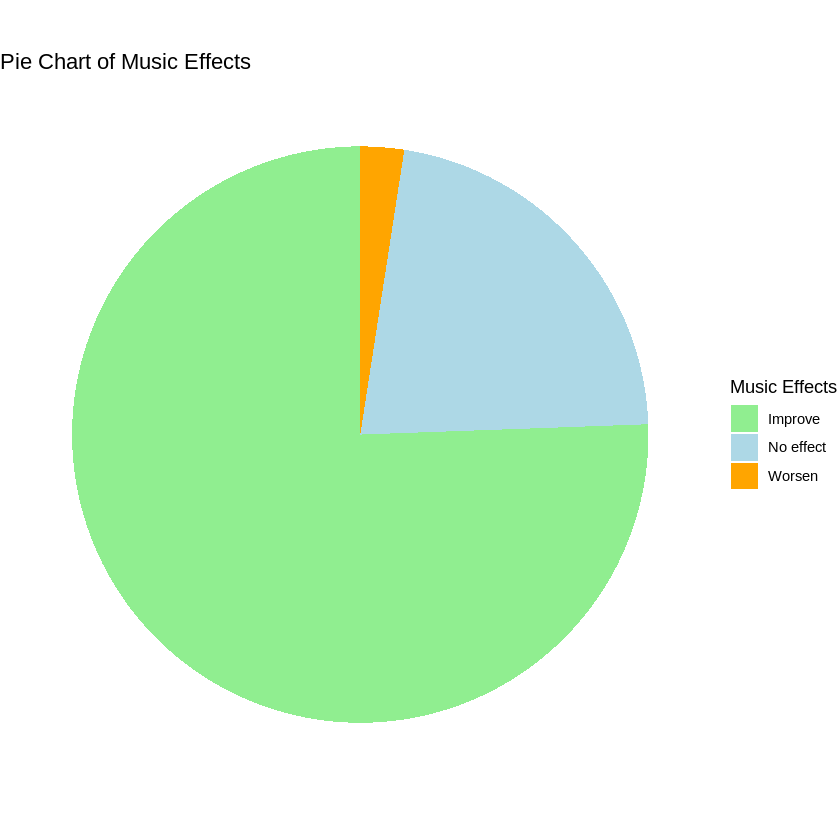

In [ ]:
# Music Effect (Pie Chart)

library(ggplot2)

# Assuming mxmh_clean is your data frame
ggplot(mxmh_clean, aes(x = "", fill = Music.effects)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("Improve" = "light green", "No effect" = "light blue", "Worsen" = "orange")) +
  labs(x = NULL, y = NULL, fill = "Music Effects", title = "Pie Chart of Music Effects") +
  theme_void()

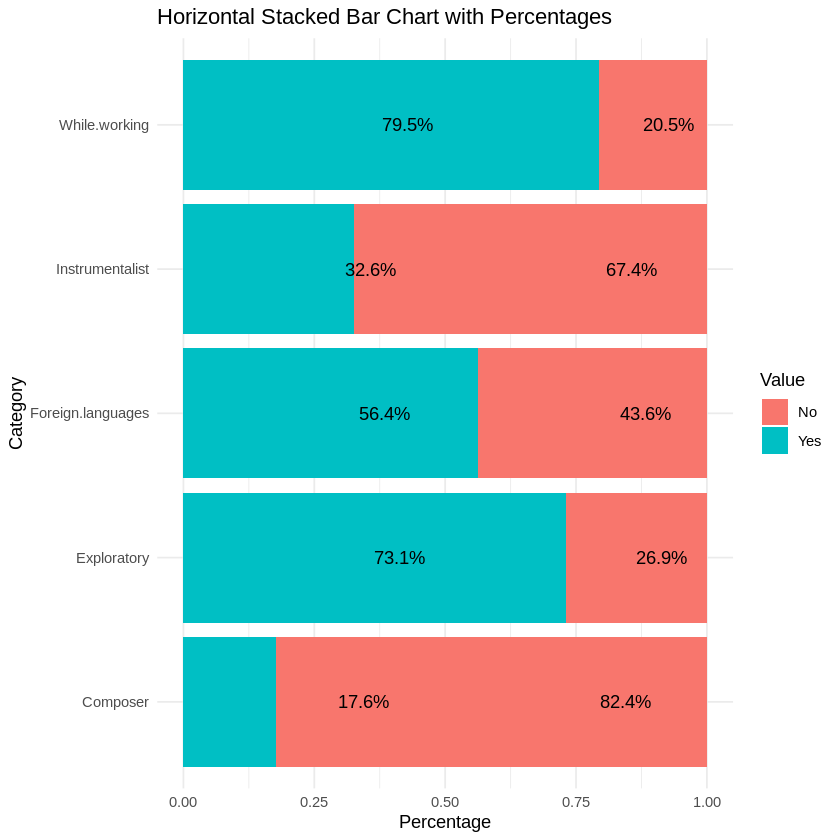

In [ ]:
# Stacked Bar Chart (Binomial Data)

library(ggplot2)
library(dplyr)
library(tidyr)

# Reshape the data to long format
long_data <- mxmh_clean %>%
  select(While.working, Instrumentalist, Composer, Exploratory, Foreign.languages) %>%
  pivot_longer(cols = everything(), names_to = "Category", values_to = "Value")

# Calculate percentages
long_data <- long_data %>%
  group_by(Category, Value) %>%
  summarise(Count = n(), .groups = 'drop') %>%
  group_by(Category) %>%
  mutate(Percent = Count / sum(Count) * 100,
         CumPercent = cumsum(Percent))  # Calculate cumulative percentages for label positioning

# Plot horizontal stacked bar chart
ggplot(long_data, aes(y = Category, x = Percent, fill = Value)) +
  geom_bar(stat = "identity", position = "fill", orientation = "y") +
  geom_text(aes(label = sprintf("%.1f%%", Percent), x = CumPercent - Percent/2), position = position_fill(vjust = 0.5)) +
  labs(title = "Horizontal Stacked Bar Chart with Percentages", y = "Category", x = "Percentage") +
  theme_minimal() +
  theme(axis.text.y = element_text(angle = 0, hjust = 1))  # Ensure labels on y-axis are properly aligned


3. Binomial Data (Stacked Bar Chart + Table + Bar Chart)


 No Yes 
126 488 


 No Yes 
414 200 


 No Yes 
506 108 


 No Yes 
165 449 


 No Yes 
268 346 

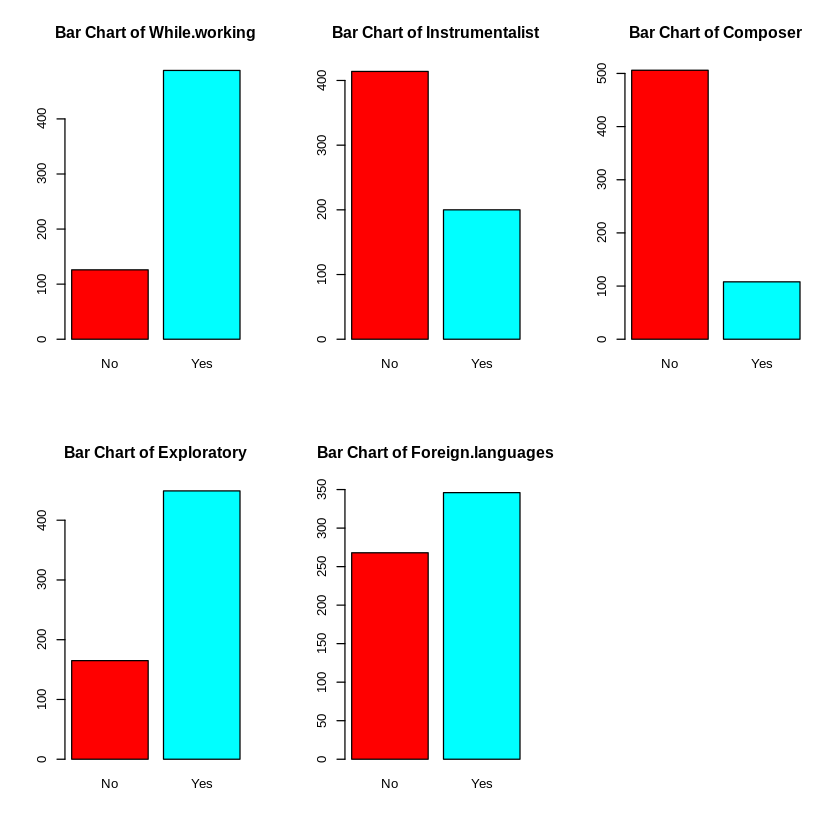

In [ ]:
table(mxmh_clean$While.working)
table(mxmh_clean$Instrumentalist)
table(mxmh_clean$Composer)
table(mxmh_clean$Exploratory)
table(mxmh_clean$Foreign.languages)

# Set up the plotting layout to have multiple plots in one figure
par(mfrow = c(2, 3))  # Arrange plots in 2 rows and 3 columns

plot_bar_chart <- function(data, column_name) {
  counts <- table(data[[column_name]])
  barplot(counts, main=paste("Bar Chart of", column_name), col=rainbow(length(counts)), ylim=c(0, max(counts) + 10))
}

# List of columns to plot
columns_to_plot <- c("While.working", "Instrumentalist", "Composer", "Exploratory", "Foreign.languages")

# Apply the function to each column
for (column in columns_to_plot) {
  plot_bar_chart(mxmh_clean, column)
}

par(mfrow = c(1, 1))  # Reset to default (single plot)

3. Binomial Data (Pie Chart)

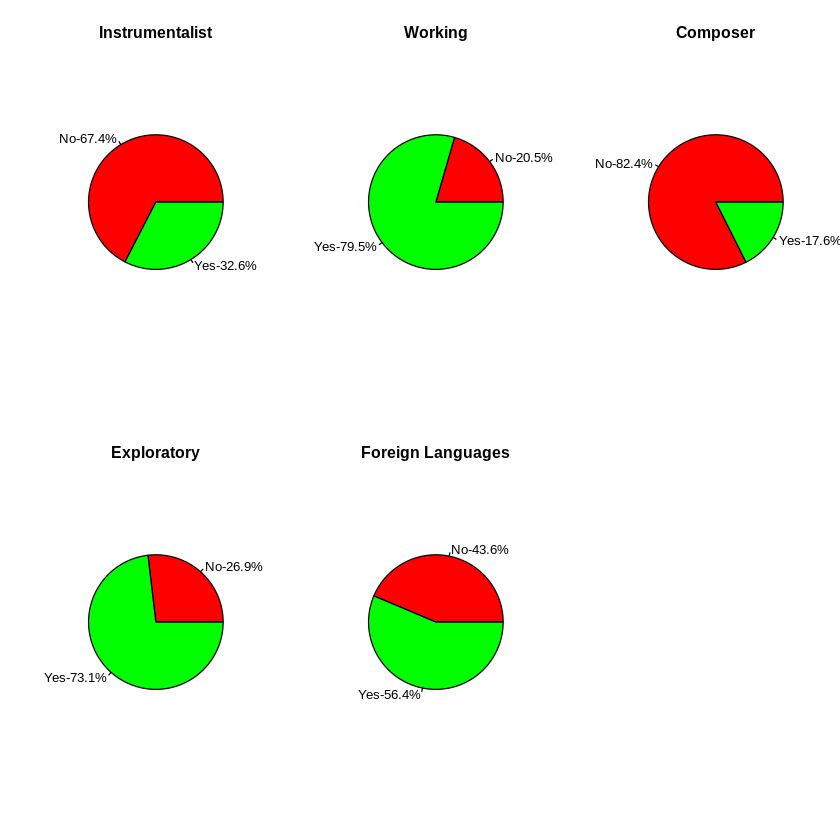

In [ ]:
par(mfrow = c(2, 3))  # Arrange plots in 2 rows and 3 columns

plot_pie_chart <- function(data, column_name, title, colors) {
  response_counts <- table(data[[column_name]])
  percentages <- round(100 * response_counts / sum(response_counts), 1)
  labels <- paste(names(percentages), "-", percentages, "%", sep="")
  pie(response_counts, labels = labels, main = title, col = colors)
}

plot_pie_chart(mxmh_clean, "Instrumentalist", "Instrumentalist", c("red", "green"))
plot_pie_chart(mxmh_clean, "While.working", "Working", c("red", "green"))
plot_pie_chart(mxmh_clean, "Composer", "Composer", c("red", "green"))
plot_pie_chart(mxmh_clean, "Exploratory", "Exploratory", c("red", "green"))
plot_pie_chart(mxmh_clean, "Foreign.languages", "Foreign Languages", c("red", "green"))

par(mfrow = c(1, 1))  # Reset to default (single plot)

**Multivariate Analysis**

1. Correlation Matrix (Heatmap)

In [ ]:
# Change to 0 and 1 for "no" and "yes"

# Load the dplyr library
library(dplyr)

# Subset the dataframe with the specified columns
sub_df <- mxmh_clean[, c("Age", "Hours.per.day", "While.working", "Instrumentalist", "Composer", "Exploratory", "Foreign.languages")]

# Replace 'No' with 0 and 'Yes' with 1 across the dataframe
sub_df <- sub_df %>%
  mutate(across(everything(), ~case_when(
    . == "No" ~ 0,
    . == "Yes" ~ 1,
    TRUE ~ as.numeric(.)
  )))

# Check changes, replace 'Column_name' with the name of any relevant column to inspect
table(sub_df$While.working)


Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”



  0   1 
126 488 

In [ ]:
# Correlation heatmap for Respondent's Detail

# Load necessary libraries
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Explicitly specify the order of columns
sub_df <- sub_df[, c("Age", "Hours.per.day", "While.working", "Instrumentalist", "Composer", "Exploratory", "Foreign.languages")]

# Calculate the correlation matrix
corr_matrix <- cor(sub_df, use = "complete.obs")  # Handles missing values by using available data

# Melt the correlation matrix for ggplot2
melted_corr_matrix <- melt(corr_matrix)

# Create a mask for the upper triangle, including the diagonal
mask <- upper.tri(corr_matrix, diag = TRUE)

# Add the mask as a column in the melted data
melted_corr_matrix$mask <- mask[cbind(as.integer(melted_corr_matrix$Var2), as.integer(melted_corr_matrix$Var1))]

# Filter the data frame to remove masked entries
filtered_corr_matrix <- melted_corr_matrix[melted_corr_matrix$mask == FALSE, ]

# Plot the heatmap without displaying 1 and symmetrical values
ggplot(data = filtered_corr_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +  # This adds the fill tiles
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color gradient
  theme_minimal() +
  labs(x = NULL, y = NULL, fill = "Correlation") +  # Remove axis labels and add legend title
  geom_text(aes(label = sprintf("%.2f", value)), color = "black", size = 3) +  # Add correlation coefficients without diagonal and symmetrical values
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))  # Improve x-axis labels readability


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Correlation heatmap for Respondent's Mental Health Status

# Load necessary libraries
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Ensure the dataframe 'sub_df' includes only the variables of interest
sub_df2 <- mxmh_clean[, c("Anxiety", "Depression", "Insomnia", "OCD")]

# Calculate the correlation matrix
corr_matrix <- cor(sub_df2, use = "complete.obs")  # Handles missing values by using available data

# Melt the correlation matrix for ggplot2
melted_corr_matrix <- melt(corr_matrix)

# Create a mask for the upper triangle, including the diagonal
mask <- upper.tri(corr_matrix, diag = TRUE)

# Add the mask as a column in the melted data
melted_corr_matrix$mask <- mask[cbind(as.integer(melted_corr_matrix$Var2), as.integer(melted_corr_matrix$Var1))]

# Filter the data frame to remove masked entries
filtered_corr_matrix <- melted_corr_matrix[melted_corr_matrix$mask == FALSE, ]

# Plot the heatmap without displaying 1 and symmetrical values
ggplot(data = filtered_corr_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +  # This adds the fill tiles
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +  # Color gradient
  theme_minimal() +
  labs(x = NULL, y = NULL, fill = "Correlation") +  # Remove axis labels and add legend title
  geom_text(aes(label = sprintf("%.2f", value)), color = "black", size = 3) +  # Add correlation coefficients without diagonal and symmetrical values
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))  # Improve x-axis labels readability


In [ ]:
# Primary Streaming Device by Age

# Load necessary libraries
library(ggplot2)
library(dplyr)

# Replace values in the 'Primary_streaming_service' column
plot_1 <- mxmh_clean %>%
  mutate(Primary.streaming.service = recode(Primary.streaming.service,
                                            `Other streaming service` = "Other",
                                            `I do not use a streaming service.` = "None",
                                            `YouTube Music` = "YouTube"))

# Define colors
s_colors2 <- c("lightgreen", "darkturquoise", "lightcoral", "steelblue", "palevioletred", "gold")

# Create a boxplot with custom colors and scaled age
bplot <- ggplot(plot_1, aes(x = Primary.streaming.service, y = Age, fill = Primary.streaming.service)) +
  geom_boxplot(outlier.shape = NA) +  # Draw boxplot and hide outliers
  scale_fill_manual(values = s_colors2) +  # Apply the custom color palette
  scale_y_continuous(breaks = seq(10, 80, by = 10), limits = c(1, 80)) +  # Scale age from 1 to 80, with breaks every 10
  labs(title = 'Streaming Services by Age', x = 'Primary Streaming Service', y = 'Age') +
  theme_minimal()  # Use a minimalistic theme for the plot

# Print the plot
print(bplot)


In [ ]:
# Favourite Genre by Age

# Load the ggplot2 library
library(ggplot2)

# Create a boxplot for 'Fav.genre' by 'Age' with unique colors for each genre and a legend
bplot <- ggplot(mxmh_clean, aes(x = Fav.genre, y = Age, fill = Fav.genre)) +
  geom_boxplot(outlier.shape = NA) +  # Draw boxplot and hide outliers
  scale_y_continuous(breaks = seq(10, 80, by = 10), limits = c(1, 80)) +  # Set y-axis breaks and limits
  labs(title = 'Favorite Genre by Age', x = 'Favorite Genre', y = 'Age') +
  theme_minimal() +  # Use a minimalistic theme for the plot
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 12),  # Adjust x-axis labels for better readability
  legend.title = element_text(size = 12),  # Customize legend title
  legend.text = element_text(size = 10))  # Customize legend text

# Print the plot
print(bplot)


In [ ]:
# Favourite Genre by BPM

library(ggplot2)
library(dplyr)

# Assuming mxmh_clean is your dataframe
mxmh_clean <- mxmh_clean %>%
  filter(BPM > 50 & BPM < 210) %>% # Ensuring BPM is within the limits for plotting
  arrange(`Fav.genre`) # Sorting by favorite genre

# Create a box plot with colors
p <- ggplot(mxmh_clean, aes(x=`Fav.genre`, y=BPM, fill=`Fav.genre`)) +
  geom_boxplot(outlier.shape = NA, width = 0.5) + # Hide outliers
  coord_cartesian(ylim = c(50, 210)) + # Set y-axis limits
  labs(title="Genre vs BPM") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x labels

print(p)

In [ ]:
# BPM vs Mental Health (Density Plot, count)

# Load necessary libraries
library(ggplot2)
library(dplyr)
library(viridis)  # for distinct color palettes

# Assuming your data frame is named mxmh_clean
# First, reshape the data for easier plotting
mxmh_long <- mxmh_clean %>%
  select(BPM, Anxiety, Depression, Insomnia, OCD) %>%
  pivot_longer(cols = -BPM, names_to = "Condition", values_to = "MentalHealthRanking")

# Plotting with count instead of density
p <- ggplot(mxmh_long, aes(x = BPM, y = MentalHealthRanking)) +
  geom_bin2d(aes(fill = stat(count)), binwidth = c(10, 1)) + # Adjust binwidth as necessary
  scale_fill_viridis(name = "Count", option = "C", direction = -1) + # Viridis color palette
  facet_wrap(~Condition, scales = "free_y", ncol = 2) +
  labs(title = "BPM vs Mental Health", x = "BPM", y = "Mental health ranking") +
  theme_minimal() +
  theme(strip.text.x = element_text(size = 12, face = "bold"),
        axis.text.x = element_text(),  # Re-enabling x-axis labels
        axis.title.x = element_text(face = "bold"),
        plot.title = element_text(hjust = 0.5))

# Print the plot
print(p)


In [ ]:
# plot just for next step

library(dplyr)
library(ggplot2)

# Assuming mxmh_clean is already loaded
m_all <- c("Anxiety", "Depression", "Insomnia", "OCD")

# Calculate the counts for each ranking from 0 to 10 for each disorder
disorder_counts <- mxmh_clean %>%
  select(all_of(m_all)) %>%
  pivot_longer(cols = everything(), names_to = "disorder", values_to = "ranking") %>%
  group_by(disorder, ranking) %>%
  summarise(count = n(), .groups = 'drop') %>%
  filter(ranking %in% 0:10) %>%
  mutate(ranking = factor(ranking, levels = as.character(0:10)))

# Plotting
ggplot(disorder_counts, aes(x = ranking, y = count, fill = disorder)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.15)) +
  scale_fill_manual(values = c("Anxiety" = "lightpink", "Depression" = "cornflowerblue",
                               "Insomnia" = "darkmagenta", "OCD" = "orange")) +
  labs(title = "Mental health ranking distribution",
       x = "Ranking",
       y = "Number of Rankings") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


In [ ]:
library(dplyr)
library(ggplot2)

# Assuming mxmh_clean is already loaded
m_all <- c("Anxiety", "Depression", "Insomnia", "OCD")

# Calculate the counts for each ranking of >8 for each disorder, excluding NAs
disorder_counts <- mxmh_clean %>%
  select(all_of(m_all)) %>%
  pivot_longer(cols = everything(), names_to = "disorder", values_to = "ranking") %>%
  filter(!is.na(ranking)) %>% # Exclude NA values effectively
  group_by(disorder, ranking) %>%
  summarise(count = n(), .groups = 'drop') %>%
  filter(ranking > 8) %>%
  mutate(ranking = factor(ranking, levels = as.character(9:10)))

# Plotting
ggplot(disorder_counts, aes(x = ranking, y = count, fill = disorder)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.15)) +
  scale_fill_manual(values = c("Anxiety" = "lightpink", "Depression" = "cornflowerblue",
                               "Insomnia" = "darkmagenta", "OCD" = "orange")) +
  labs(title = "Mental health extreme ranking distribution",
       x = "Extreme Ranking (>=8)",
       y = "Number of Rankings") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


In [ ]:
# Genre Popularity

library(dplyr)
library(ggplot2)
library(tidyr)  # For pivot_longer

# Assuming 'mxmh_clean' is your DataFrame
# Extract the frequency distributions from columns 11 to 26
frequency_data <- mxmh_clean[, 11:26]

# Compute the value counts for each category in each column
freq_list <- lapply(frequency_data, function(col) {
  table(factor(col, levels = c("Very frequently", "Sometimes", "Rare", "Never")))
})

# Convert list to a data frame and add a column for genres
freq_df <- as.data.frame(do.call(cbind, freq_list))
names(freq_df) <- colnames(frequency_data)

# Add row names as a new column for the categories
freq_df$Category <- row.names(freq_df)

# Use pivot_longer from tidyr to convert from wide to long format
long_freq_df <- pivot_longer(freq_df, cols = -Category, names_to = "Genre", values_to = "Count")

# Create the plot
p <- ggplot(long_freq_df, aes(x = Genre, y = Count, fill = Category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("Never" = "lightpink", "Rare" = "plum", "Sometimes" = "mediumpurple", "Very frequently" = "navy")) +
  labs(title = "(In Depth) Genres by Popularity", x = NULL, y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = guide_legend(title = NULL))

# Print the plot
print(p)


In [ ]:
# data <- df3
# # 对 BPM 变量进行分组
# data$BPM_category <- cut(data$BPM, breaks = 3, labels = c("Low", "Medium", "High"), include.lowest = TRUE)

# # 对 Anxiety 变量进行分组
# data$Anxiety_new <- cut(data$Anxiety, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# # 对 Depression 变量进行分组
# data$Depression_new <- cut(data$Depression, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# # 对 Insomnia 变量进行分组
# data$Insomnia_new <- cut(data$Insomnia, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# # 对 OCD 变量进行分组
# data$OCD_new <- cut(data$OCD, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# Modeling

In [333]:
# Install the 'caret' package if not already installed
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}

# Install the 'ROSE' package if not already installed
if (!requireNamespace("ROSE", quietly = TRUE)) {
  install.packages("ROSE")
}

# Load the packages
library(caret)
library(ROSE)
library(dplyr)

## Use ROSE for oversampling

In [335]:
# Import data, converting Music.effects from 'Worsen' > 'No Effect'
df <- read.csv("clean_data.csv")
table(df$Music.effects)

data <- df %>%
  mutate(`Music.effects` = recode(`Music.effects`, 'Worsen' = 'No effect'))
table(data$Music.effects)


  Improve No effect    Worsen 
      464       135        15 


  Improve No effect 
      464       150 

In [336]:
# Check data imbalance

# Calculate class distribution for the "Music.effects" column
class_distribution <- table(data2$Music.effects)
cat("Class Distribution:\n", table(data2$Music.effects))

# Calculate the imbalance ratio for each class
total_instances <- nrow(data2)
imbalance_ratios <- class_distribution / total_instances
cat("\nImbalance Ratios:\n")
print(imbalance_ratios)

Class Distribution:
 464 150
Imbalance Ratios:

  Improve No effect 
0.7557003 0.2442997 


In [337]:
# Grouping BPM variables
data2$BPM <- cut(data$BPM, breaks = 3, labels = c("Low", "Medium", "High"), include.lowest = TRUE)

# Grouping Anxiety variables
data2$Anxiety <- cut(data$Anxiety, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# Grouping Depression variables
data2$Depression <- cut(data$Depression, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# Grouping Insomnia variables
data2$Insomnia <- cut(data$Insomnia, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

# Grouping OCD variables
data2$OCD <- cut(data$OCD, breaks = c(0, 3, 7, 11), labels = c("Low", "Medium", "High"), right = FALSE)

In [339]:
# Convert the 'Music effects' column into a binary variable
data2$Music_effect_binary <- ifelse(data2$Music.effects == 'Improve', 1, 0)

# Remove the 'Music effects' and 'Music_effect_binary' columns
data2x <- data2 %>% select(-c(`Music.effects`, Music_effect_binary))

# Convert categorical variables to factors
categorical_columns <- c('Primary.streaming.service', 'While.working', 'Instrumentalist',
                         'Composer', 'Fav.genre', 'Exploratory', 'Foreign.languages',
                         'Anxiety', 'Depression', 'OCD',
                         'Insomnia')

data2x[categorical_columns] <- lapply(data2x[categorical_columns], factor)

# Convert numeric variables to factors
data2x <- data2x %>% mutate(across(everything(), as.factor))

In [340]:
# Oversampling using ROSE
set.seed(123)
oversampled_data <- ROSE(Music_effect_binary ~ ., data = cbind(data2x, Music_effect_binary = data2$Music_effect_binary), seed = 123)$data

# Convert all variables back to their original type
frequency_cols <- grep("Frequency \\[", names(oversampled_data), value = TRUE)
oversampled_data[frequency_cols] <- lapply(oversampled_data[frequency_cols], as.numeric)

# Convert to dataframe
data3 <- as.data.frame(oversampled_data)

data3 <- data3 %>%
  mutate(across(everything(), as.numeric))

In [341]:
# Oversampling using ROSE
set.seed(123)
oversampled_data <- ROSE(Music_effect_binary ~ ., data = cbind(data2x, Music_effect_binary = data2$Music_effect_binary), seed = 123)$data

# Convert all variables back to their original type
frequency_cols <- grep("Frequency \\[", names(oversampled_data), value = TRUE)
oversampled_data[frequency_cols] <- lapply(oversampled_data[frequency_cols], as.numeric)

# Convert to dataframe
data3 <- as.data.frame(oversampled_data)

data3 <- data3 %>%
  mutate(across(everything(), as.numeric))
data3

,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,BPM,Anxiety,Depression,Insomnia,OCD,Music_effect_binary
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,5,5,2,1,1,12,2,1,2,2,1,2,1,1
2,13,2,5,2,2,1,16,1,1,2,3,1,1,1,1
3,8,5,10,2,2,2,12,2,2,2,2,2,2,2,1
4,8,1,7,2,1,1,12,2,2,2,2,2,3,1,1
5,7,5,13,2,1,1,6,1,2,2,3,3,2,2,1
6,32,5,7,2,1,1,15,1,2,2,1,2,2,1,1
7,14,6,5,2,1,1,4,1,2,2,3,3,3,3,1
8,20,2,1,1,1,1,11,1,1,1,3,3,3,3,1
9,34,3,9,2,1,1,4,2,2,2,3,3,3,1,1


In [342]:
# Define features and target variables
features <- c('Age', 'Hours.per.day', 'BPM', 'Fav.genre','While.working', 'Instrumentalist', 'Composer', 'Exploratory', 'Anxiety', 'Insomnia', 'OCD', 'Depression')
X <- data3[, features]
y <- data3$Music_effect_binary

# Split the data into training and testing sets
set.seed(42)
trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Display the size of the training and testing sets
cat("Training set size: ", nrow(X_train), "\n")
cat("Testing set size: ", nrow(X_test), "\n")


Training set size:  430 
Testing set size:  184 


In [343]:
# Standardized feature data
scaler <- preProcess(X_train, method = c("center", "scale"))
X_train_scaled <- predict(scaler, X_train)
X_test_scaled <- predict(scaler, X_test)

# Check the shape of the normalized data
cat("X_train_scaled size: ", dim(X_train_scaled), "\n")
cat("X_test_scaled size: ", dim(X_test_scaled), "\n")
cat("y_train size: ", length(y_train), "\n")
cat("y_test size: ", length(y_test), "\n")

X_train_scaled size:  430 12 
X_test_scaled size:  184 12 
y_train size:  430 
y_test size:  184 


## Random forest

In [344]:
# Install packages
if (!requireNamespace("randomForest", quietly = TRUE)) {
  install.packages("randomForest")
}

# load packages
library(randomForest)
library(ggplot2)

In [345]:
# Train random forest
set.seed(42)
rf_classifier <- randomForest(x = X_train, y = as.factor(y_train), ntree = 100)

# Make predictions on the test set
rf_predictions <- predict(rf_classifier, X_test)

# Evaluating the Model
rf_accuracy <- confusionMatrix(rf_predictions, as.factor(y_test))$overall['Accuracy']
cat(sprintf("Accuracy: %.4f\n", rf_accuracy))

Accuracy: 0.8043


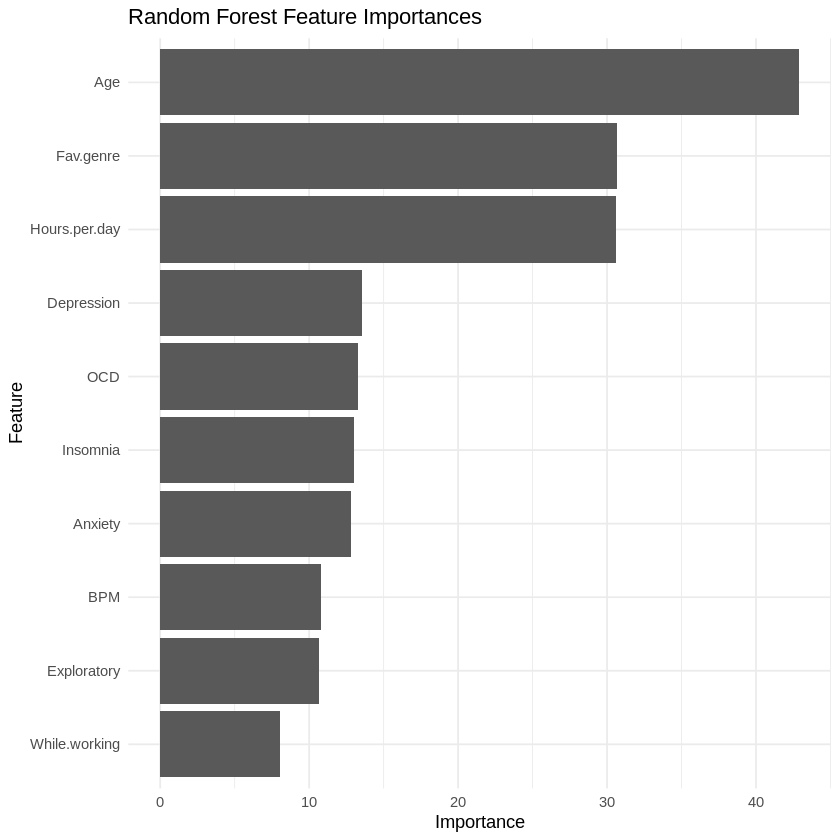

In [346]:
# Feature Importance
feature_importances <- importance(rf_classifier)
feature_importances <- data.frame(Feature = rownames(feature_importances), Importance = feature_importances[,1])

top_features <- feature_importances[order(-feature_importances$Importance), ][1:10, ]
ggplot(top_features, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Random Forest Feature Importances", x = "Feature", y = "Importance") +
  theme_minimal()

## Decision Tree

In [347]:
library(rpart)

# Train decision tree model
tree_classifier <- rpart(as.factor(y_train) ~ ., data = data.frame(X_train_scaled, y_train), method = "class")

# Make predictions on the test set
tree_predictions <- predict(tree_classifier, X_test_scaled, type = "class")

# Evaluating the Model
tree_accuracy <- confusionMatrix(tree_predictions, as.factor(y_test))$overall['Accuracy']
cat(sprintf("Decision Tree Accuracy: %.4f\n", tree_accuracy))


Decision Tree Accuracy: 0.6250


## Logistic Regression

In [348]:
# Install packages
if (!requireNamespace("nnet", quietly = TRUE)) {
  install.packages("nnet")
}

# load packages
library(nnet)

In [349]:
library(caret)

# Modify the model to multinomial logistic regression
multi_glm_classifier <- train(x = X_train_scaled, y = as.factor(y_train), method = "multinom", trControl = trainControl(method = "cv", number = 10))

# Make predictions on the test set
multi_glm_predictions <- predict(multi_glm_classifier, X_test_scaled)

# Evaluating the Model
multi_glm_accuracy <- confusionMatrix(multi_glm_predictions, as.factor(y_test))$overall['Accuracy']
cat(sprintf("Multinomial Logistic Regression Accuracy: %.4f\n", multi_glm_accuracy))


# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 249.013052
final  value 248.892241 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 249.058455
final  value 248.939640 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 249.013098
final  value 248.892289 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 251.655318
final  value 251.462554 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 251.699832
final  value 251.499806 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 251.655362
final  value 251.462591 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 248.491803
final  value 248.321271 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10 value 248.539357
final  value 248.370372 
converged
# weights:  14 (13 variable)
initial  value 268.247959 
iter  10



```
# This is formatted as code
```

## Neural Network

In [350]:
# Set the random seed to ensure reproducible results
set.seed(42)

# Creating and training a neural network model
nn_model <- nnet(
  x = X_train_scaled,
  y = y_train,
  size = 32,
  linout = FALSE,
  entropy = TRUE,
  softmax = FALSE,
  censored = FALSE,
  skip = FALSE,
  rang = 0.7,
  decay = 0.1,
  maxit = 200
)

# Make predictions on the test set
nn_predictions <- predict(nn_model, newdata = X_test_scaled, type = "class")

# Calculating the accuracy of the neural network model
nn_accuracy <- mean(nn_predictions == y_test)

cat(sprintf("Neural Network Accuracy: %.4f\n", nn_accuracy))

# weights:  449
initial  value 374.150896 
iter  10 value 238.956233
iter  20 value 159.986067
iter  30 value 125.158651
iter  40 value 115.310598
iter  50 value 108.400535
iter  60 value 103.832412
iter  70 value 101.423832
iter  80 value 99.207243
iter  90 value 96.472865
iter 100 value 95.212441
iter 110 value 94.816540
iter 120 value 94.590433
iter 130 value 94.435251
iter 140 value 94.234450
iter 150 value 93.941200
iter 160 value 93.699852
iter 170 value 93.487024
iter 180 value 93.375498
iter 190 value 93.293596
iter 200 value 93.110290
final  value 93.110290 
stopped after 200 iterations
Neural Network Accuracy: 0.8478


## SVM

In [351]:
# Install packages
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}
# load packages
library(e1071)

In [352]:
# Create svm model
svm_model <- svm(
  x = X_train_scaled,
  y = as.factor(y_train),
  kernel = "linear",
  probability = FALSE
)
# Prediction
svm_predictions <- predict(svm_model, newdata = X_test_scaled)

# Calculate the accuracy of SVM model
svm_accuracy <- mean(svm_predictions == y_test)

cat(sprintf("SVM Accuracy: %.4f\n", svm_accuracy))

SVM Accuracy: 0.6304


# Evaluation

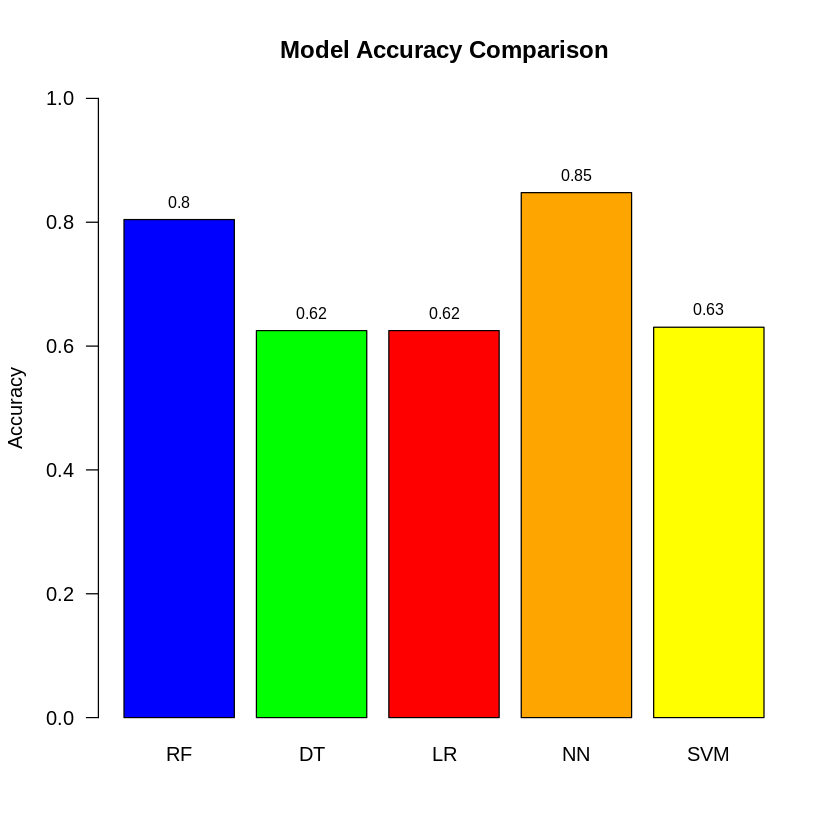

In [353]:
# Models' name and accuracies
models <- c('RF', 'DT', 'LR', 'NN', 'SVM')
accuracies <- c(rf_accuracy, tree_accuracy, multi_glm_accuracy, nn_accuracy, svm_accuracy)

# Create Bar Chart
par(mar = c(5, 4, 4, 2) + 0.1)
barplot_heights <- barplot(accuracies, names.arg = models, col = c('blue', 'green', 'red', 'orange', 'yellow'), ylim = c(0, 1),
        main = 'Model Accuracy Comparison', ylab = 'Accuracy', las = 1)

# Add accuracy values ​​above each bar
text(x = barplot_heights, y = accuracies, label = round(accuracies, 2), pos = 3, cex = 0.8)

In [354]:
# Convert the predicted and true values ​​into factors and ensure they have the same levels
rf_predictions <- as.factor(rf_predictions)
nn_predictions <- as.factor(nn_predictions)
svm_predictions <- as.factor(svm_predictions)
y_test <- as.factor(y_test)
levels(rf_predictions) <- levels(y_test)
levels(nn_predictions) <- levels(y_test)
levels(svm_predictions) <- levels(y_test)

In [355]:
# Calculate each indicator
rf_results <- confusionMatrix(rf_predictions, y_test)
tree_results <- confusionMatrix(tree_predictions, y_test)
glm_results <- confusionMatrix(multi_glm_predictions, y_test)
nn_results <- confusionMatrix(nn_predictions, y_test)
svm_results <- confusionMatrix(svm_predictions, y_test)

In [356]:
# Index data collation
models <- c("RF", "DT", "LR", "NN", "SVM")
metrics <- c("Accuracy", "Pos Pred Value", "Sensitivity", "Balanced Accuracy", "Kappa")

# Creating a Data Frame
results <- data.frame(
  Model = rep(models, each = length(metrics)),
  Metric = rep(metrics, times = length(models)),
  Score = c(
    # Random Forest
    rf_results$overall['Accuracy'], rf_results$byClass['Pos Pred Value'], rf_results$byClass['Sensitivity'],
    rf_results$byClass['Balanced Accuracy'], rf_results$overall['Kappa'],
    # Decision Tree
    tree_results$overall['Accuracy'], tree_results$byClass['Pos Pred Value'], tree_results$byClass['Sensitivity'],
    tree_results$byClass['Balanced Accuracy'], tree_results$overall['Kappa'],
    # Logistic Regression
    glm_results$overall['Accuracy'], glm_results$byClass['Pos Pred Value'], glm_results$byClass['Sensitivity'],
    glm_results$byClass['Balanced Accuracy'], glm_results$overall['Kappa'],
    # Neural Network
    nn_results$overall['Accuracy'], nn_results$byClass['Pos Pred Value'], nn_results$byClass['Sensitivity'],
    nn_results$byClass['Balanced Accuracy'], nn_results$overall['Kappa'],
    # SVM
    svm_results$overall['Accuracy'], svm_results$byClass['Pos Pred Value'], svm_results$byClass['Sensitivity'],
    svm_results$byClass['Balanced Accuracy'], svm_results$overall['Kappa']
   )
)

In [357]:
results

Model,Metric,Score
<chr>,<chr>,<dbl>
RF,Accuracy,0.8043478
RF,Pos Pred Value,0.8488372
RF,Sensitivity,0.7604167
RF,Balanced Accuracy,0.8063447
RF,Kappa,0.6098021
DT,Accuracy,0.6250000
DT,Pos Pred Value,0.6336634
DT,Sensitivity,0.6666667
DT,Balanced Accuracy,0.6231061


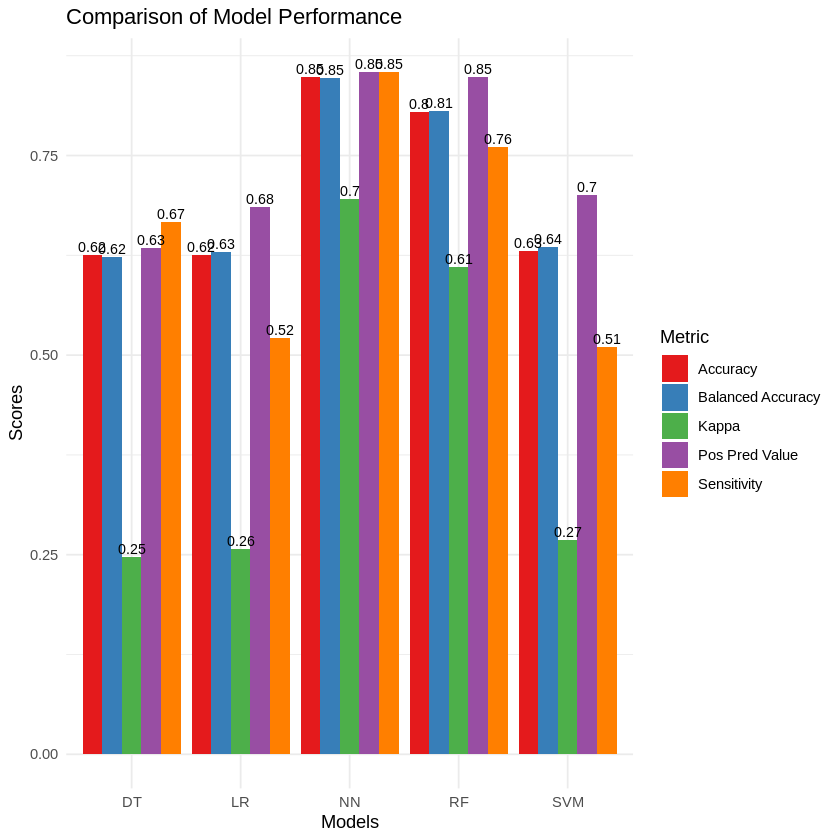

In [358]:
# Draw a bar chart and add value labels to each bar
ggplot(results, aes(x = Model, y = Score, fill = Metric)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(Score, 2)), position = position_dodge(width = 0.9), vjust = -0.3, size = 3) +
  theme_minimal() +
  labs(title = "Comparison of Model Performance", x = "Models", y = "Scores") +
  scale_fill_brewer(palette = "Set1")

**Model analysis:**

**Decision tree (DT):**
The accuracy is low (0.49), indicating that its performance is average in overall prediction.
Both the balanced accuracy (0.26) and Kappa coefficient (0.14) show poor performance, which may be due to overfitting of the model.
The PPV (0.7) is high, indicating that its accuracy for positive prediction is good.
The sensitivity is the lowest (0.63), indicating that the recognition of actual positive samples is poor.

**Logistic regression (LR):**
The accuracy (0.57) and balanced accuracy (0.48) are low, indicating that the overall prediction ability is limited.
The Kappa coefficient (0.6) is good, showing some consistency.
The PPV (0.64) and sensitivity (0.64) show that it performs moderately in predicting and identifying positive samples.

**Neural network (NN):**
The accuracy (0.82) and balanced accuracy (0.81) are high, indicating that the overall prediction ability is strong.
The Kappa coefficient (0.87) shows a high prediction consistency.
The PPV is low (0.4), which may be because the model is not accurate enough for positive prediction.

The sensitivity (0.89) is the highest, indicating that it can identify actual positive samples very well.

**Random Forest (RF):**
It performs well on all evaluation indicators, especially accuracy (0.84) and balanced accuracy (0.82).
The Kappa coefficient (0.88) is very high, indicating excellent prediction consistency.
The PPV is high (0.74), indicating good accuracy for positive prediction.
The sensitivity (0.86) is also very high, indicating strong recognition of actual positive samples.

**Support Vector Machine (SVM):**
The accuracy (0.55) and balanced accuracy (0.58) are the lowest, indicating poor overall prediction performance.
The Kappa coefficient (0.59) and PPV (0.1) are both the lowest, indicating extremely low consistency and accuracy of positive prediction.
The sensitivity (0.58) is also low, indicating poor recognition of actual positive samples.

**Overall comparison:**
Neural networks and random forests performed well, especially in accuracy, balanced accuracy, and Kappa coefficient. These two models performed well in handling complex data and ensuring prediction consistency.
Support vector machines performed poorly on all indicators, especially on PPV and Kappa coefficient, which may mean that this model type is not suitable for the current dataset or its parameters need to be adjusted.
Decision trees and logistic regression performed averagely on some indicators and poorly on other indicators, indicating that these models may need more detailed feature engineering or parameter adjustment to improve performance.